# Linear Model Selection And Regularisation

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

**1. We perform best subset, forward stepwise, and backward stepwise selection on a single data set. For each approach, we obtain $p + 1$ models, containing $0, 1, 2, . . . ,p$ predictors. Explain your answers**

*(a) Which of the three models with k predictors has the smallest training RSS?*

Best subset selection would have the smallest training RSS for a given k predictors. This is because, both backward and forward stepwise are constrained by the choice of predictors to include/remove in the previous step. The result is best subset can consider all combinations of the k predictors to choose from at each step and therefore will certainly find the combination that minimises the training RSS.

*(b) Which of the three models with k predictors has the smallest test RSS?*

It is unclear which model will have the smallest test RSS. Best subset may overfit to the training data leading to poor test RSS scores. Forward and backward stepwise selection being constrained by their choices at previous steps may strike a balance between bias and variance leading to good test RSS scores.

**2. Comparing Regression Methods**

For parts (a) through (c), indicate which of the following is correct Justify your answer.

- More flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.
- More flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.
- Less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.
- Less flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.

*(a) The lasso relative to least squares*

Is less flexible and will give improved predicition accuracy when the increase in bias is less than the decrease variance. The penalty term in the equation to fit a lasso regression has the effect of shrinking some coefficients to zero when the tuning parameter is sufficiently large. This leads to a simpler less flexible model

*(b) Ridge regression relative to least squares*

Is less flexible and will give improved predicition accuracy when the increase in bias is less than the decrease variance. The penalty term in the equation to fit a ridge regression has the effect of shrinking coefficients towards zero. This leads to a simpler less flexible model

*(c) non-linear method relative to least squares*

Is more flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias. Non-linear methods can fit to a wider range of relationships between the predictors and the response. Hence they are more flexible than least squares which can only fit linear models


**3. Suppose we estimate the regression coefficients in a linear regression model by minimizing**

$$
\sum^{n}_{i=1} (y_{i} - \beta_{0} - \sum_{j=1}^{p}\beta_{j}x_{ij})^{2} \text{ subject to } \sum_{j=1}^{p}|\beta_{j}|\le s
$$

**for a particular value of s. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.**

*(a) As we increase s from 0, the training RSS will:*

The training RSS will decrease steadily. Increasing s is equivalent to increasing the flexibility of the model because larger coefficients can be fit, more flexible learning methods are more likely to overfit to the training data (they capture the noise in the training data) and hence as s increases the training RSS will decrease.

*(b) same for test RSS*

The test RSS will decrease initially and then begin to increase in a U shape. As we increase s our model will start to generalise well to the test data, however, as s becomes too large the coeffcients will start to capture noise in the training data and the test RSS will increase.

*(c) same for variance*

The variance will increase steadily as s increases. As s increases the flexibility of the model increases, this increases the scope for different data points to influence the fitted coefficients resulting in higher variance. Low values of s produces models with low variance because only a small range of values can used for the coefficients.

*(d) same for squared bias*

The squared bias will decrease steadily. When s is very low the bias in the model will be very high, the model can only fit a limited range of values for coeffcients and therefore their expected value will not equal to true value. As s increases larger coeffcients can be fit resulting in lower bias as we get closer to the true coefficients.

*(e) same for irreducible error*

This will stay the same regardless of the value of s. The irreducible error term captures the effect of variables not included in the model, random measurement errors and anything else we cannot measure. As such the value of s does not influence this term.


**4. Suppose we estimate the regression coefficients in a linear regression model by minimizing**

$$
\sum^{n}_{i=1} (y_{i} - \beta_{0} - \sum_{j=1}^{p}\beta_{j}x_{ij})^{2} \text{ subject to } \sum_{j=1}^{p}\beta_{j}^{2}\le s
$$

**5. It is well-known that ridge regression tends to give similar coefficient values to correlated variables, whereas the lasso may give quite different coefficient values to correlated variables. We will now explore this property in a very simple setting.**

Suppose that $n = 2$, $p = 2$, $x_{11} = x_{12}$, $x_{21} = x_{22}$. Furthermore, suppose that $y_{1}+y_{2} = 0$ and $x_{11}+x_{21} = 0$ and $x_{12}+x_{22} = 0$, so that the estimate for the intercept in a least squares, ridge regression, or lasso model is zero: $\hat{\beta}_{0} = 0$.

Lets create a python representation of this dataset to aid our understanding.

Here we have $x_{11} = x_{12} = 2$ and $x_{21} = x_{22} = -2$. Furthermore, $y_{1} + y_{2} = -1 + 1 = 0$ and $x_{11} + x_{21} = 2 - 2 = 0$ and $x_{12} + x_{22} = 2 - 2 = 0$

In [10]:
dataset = pd.DataFrame(data = {
    'x1':[2, -2],
    'x2':[2, -2],
    'y':[-1, 1]
})

dataset

,x1,x2,y
0,2,2,-1
1,-2,-2,1


Note that our predictors are perfectly postively correlated with eachother

In [11]:
dataset.corr()

,x1,x2,y
x1,1.0,1.0,-1.0
x2,1.0,1.0,-1.0
y,-1.0,-1.0,1.0


*(a) Write out the ridge regression optimization problem in this setting.*

In this setting ridge regression aims to minimise the following expression,

$$
\sum_{i=1}^{2}(y_{i} - \sum_{j=1}^{2}\beta_{j}x_{ij})^{2} + \lambda\sum_{j=1}^{2}\beta^{2}_{j}
$$

Where, because $x_{i1} = x_{i2}$ we have

$$
\sum_{j=1}^{2}\beta_{j}x_{ij} = x_{i}\sum_{j=1}^{2}\beta_{j}
$$

Therefore,

$$
(y_{i} - \sum_{j=1}^{2}\beta_{j}x_{ij})^{2} = (y_{i} - x_{i}\sum_{j=1}^{2}\beta_{j})^{2}
$$

Which means the aim is to minimise

$$
\sum_{i=1}^{2}(y_{i} - x_{i}\sum_{j=1}^{2}\beta_{j})^{2} + \lambda\sum_{j=1}^{2}\beta^{2}_{j}
$$

Which can be written as

$$
(y_{1} - x_{1}\beta_{1} - x_{1}\beta_{2})^{2} + (y_{2} - x_{2}\beta_{1} - x_{2}\beta_{2})^{2} + \lambda\beta^{2}_{1} + \lambda\beta^{2}_{2}
$$


*(b) Argue that in this setting, the ridge coefficient estimates satisfy $\hat{\beta}_{1} = \hat{\beta}_{2}$*

To find the solution to the above, we take the derivative of above expression with respect to $\beta_{1}$ and $\beta_{2}$,

$$
\frac{\partial}{\partial \beta_{1}} (y_{1} - x_{1}\beta_{1} - x_{1}\beta_{2})^{2} + (y_{2} - x_{2}\beta_{1} - x_{2}\beta_{2})^{2} + \lambda\beta^{2}_{1} + \lambda\beta^{2}_{2} = -2x_{1}(y_{1} - x_{1}\beta_{1} - x_{1}\beta_{2}) - 2x_{2}(y_{2} - x_{2}\beta_{1} - x_{2}\beta_{2}) + 2\lambda\beta_{1}
$$

$$
\frac{\partial}{\partial \beta_{2}}(y_{1} - x_{1}\beta_{1} - x_{1}\beta_{2})^{2} + (y_{2} - x_{2}\beta_{1} - x_{2}\beta_{2})^{2} + \lambda\beta^{2}_{1} + \lambda\beta^{2}_{2} = -2x_{1}(y_{1} - x_{1}\beta_{1} - x_{1}\beta_{2}) - 2x_{2}(y_{2} - x_{2}\beta_{1} - x_{2}\beta_{2}) + 2\lambda\beta_{2}
$$

Then setting them to zero and solving for the coefficients we find

$$
\beta_{1} = \frac{x_{1}(y_{1} - x_{1}\beta_{1} - x_{1}\beta_{2}) + x_{2}(y_{2} - x_{2}\beta_{1} - x_{2}\beta_{2})}{\lambda}
$$
$$
\beta_{2} = \frac{x_{1}(y_{1} - x_{1}\beta_{1} - x_{1}\beta_{2}) + x_{2}(y_{2} - x_{2}\beta_{1} - x_{2}\beta_{2})}{\lambda}
$$

*(c) Write out the lasso optimization problem in this setting.*

In general the lasso regression seeks to minimise

$$
\sum_{i=1}^{2}(y_{i} - \sum_{j=1}^{2}\beta_{j}x_{ij})^{2} + \lambda\sum_{j=1}^{2}|\beta_{j}|
$$

This can be simplfied, given the current setting using similar logic as above for,

$$
(y_{1} - x_{1}\beta_{1} - x_{1}\beta_{2})^{2} + (y_{2} - x_{2}\beta_{1} - x_{2}\beta_{2})^{2} + \lambda|\beta_{1}| + \lambda|\beta_{2}|
$$


*(d) Argue that in this setting, the lasso coefficients $\hat{\beta}_{1}, \hat{\beta}_{2}$ are not unique—in other words, there are many possible solutions to the optimization problem in (c). Describe these solutions.*

To find the solutions to the above optimisation problem we use the alternate lass constraint $|\beta_{1}| + |\beta_{2}| \lt s$.

When plotted this constraint forms a diamond centred on the origin (0, 0). The squared optimisation problem above can be simplified using the facts given in the question for minimise $(y_{1} - (\hat{\beta}_{1} + \hat{\beta}_{2})x_{11})^{2}$

Clearly a simple solution is $\hat{\beta}_{1} + \hat{\beta}_{2} = \frac{y_{1}}{x_{11}}$. This is a line paralell to the edge of the Lasso-diamond $\hat{\beta}_{1} + \hat{\beta}_{2} = s$. i.e. the entire edge of the diamond lasso is a potential solution. 

Similar reasoning can show the edge $\hat{\beta}_{1} + \hat{\beta}_{2} = -s$ is also a set of potential solutions



**6. A simple special case for the ridge and lasso**

In order to obtain a better intuition about the behavior of ridge regression and the lasso, consider a simple special case with $n = p$, and $X$ a diagonal matrix with 1’s on the diagonal and 0’s in all off-diagonal elements. To simplify the problem further, assume also that we are performing regression without an intercept. With these assumptions, the usual least squares problem simplifies to finding $\beta_{1}, \beta_{2},...,\beta_{p}$ that minimize

![alt text](../images/least_squares_special_case.png)


We will now explore 6.12 and 6.13 further (see below)

**Ridge under special case**

![alt text](../images/ridge_special_case.png)

**Lasso under special case**

![alt text](../images/lasso_special_case.png)


*(a) Consider 6.12 with $p=1$. For some choice of $y_{1}$ and $\lambda \gt 0$ plot 6.12 as function of $\beta_{1}$. The plot should confirm that 6.12 is solved by 6.14*

6.14 is displayed below for reference.

![alt text](../images/ridge_solution_special_case.png)

To plot 6.12 we will write a python function that takes as its arguments $y_{1}$ and $\lambda$ and calculates the value of 6.12 for a range of $\beta_{1}$ values. We will call this function `ridge_special_case`. 



In [43]:
def ridge_special_case(y:float, lambda_:float) -> np.ndarray:
    beta_1 = np.linspace(-5, 5, 100)
    y_beta_1_diff_squared = (y - beta_1)**2
    lambda_beta_1_squared_prod = beta_1**2 * lambda_
    values = y_beta_1_diff_squared + lambda_beta_1_squared_prod
    return np.concatenate((beta_1.reshape(-1, 1), values.reshape(-1, 1)), axis=1)
    

Furthermore, 6.14 states that the ridge regression estimate for $beta_{1}$ is equal to the ratio of $y_{1}$ over $1 + \lambda$. We have selected a value of 2 for $y_{1}$ and a value of 9 for $\lambda$. Hence, we should see the minimum of 6.12 as a function of $\beta_{1}$ at 0.2.

We will plot the point below with a red *.

Text(0.5, 1.0, '6.12 as a function of $\\beta_{1}$, $y = 2$, $\\lambda=10$')

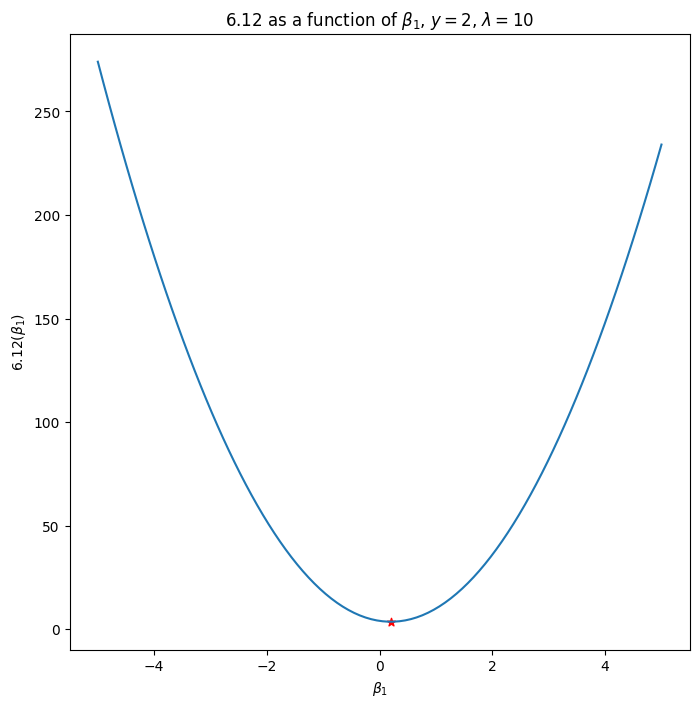

In [52]:
rsc_values = ridge_special_case(2, 9)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

ax.plot(rsc_values[:, 0], rsc_values[:, 1])
ax.scatter(x=[0.2], y=[(2-0.2)**2 + 0.2**2 * 9], marker='*', c='r')

ax.set_xlabel(r'$\beta_{1}$')
ax.set_ylabel(r'6.12($\beta_{1}$)')
ax.set_title(r'6.12 as a function of $\beta_{1}$, $y = 2$, $\lambda=10$')

*(b) Consider (6.13) with $p = 1$. For some choice of $y_{1}$ and $\lambda > 0$, plot (6.13) as a function of $\beta_{1}$. Your plot should confirm that (6.13) is solved by (6.15).*

Below is 6.15 for reference

![alt text](../images/lasso_solution.png)

Clearly to demonstrate this graphically will require three seperate plots. We will follow the same process as above and write a function called `lasso_special_case` that takes values of $y_{1}$ and $\lambda$, and calculates the value of 6.13 for various $\beta_{1}$ 's

In [53]:
def lasso_special_case(y:float, lambda_:float) -> np.ndarray:
    beta_1 = np.linspace(-5, 5, 100)
    y_beta_1_diff_squared = (y - beta_1)**2
    lamba_abs_beta_1_prod = lambda_ * abs(beta_1)
    values = y_beta_1_diff_squared + lamba_abs_beta_1_prod
    return np.concatenate((beta_1.reshape(-1, 1), values.reshape(-1, 1)), axis=1)

In [54]:
lasso_case_1 = lasso_special_case(5, 4)
lasso_case_2 = lasso_special_case(-5, 4)
lasso_case_3 = lasso_special_case(2, 6)



In [65]:
expected_solutions = (5 - 4/2, -5 + 4/2, 0)
expected_solutions

(3.0, -3.0, 0)

Lets plot the expected solutions with a red star.

We can see that the graphs of the function align with the expected solutions.

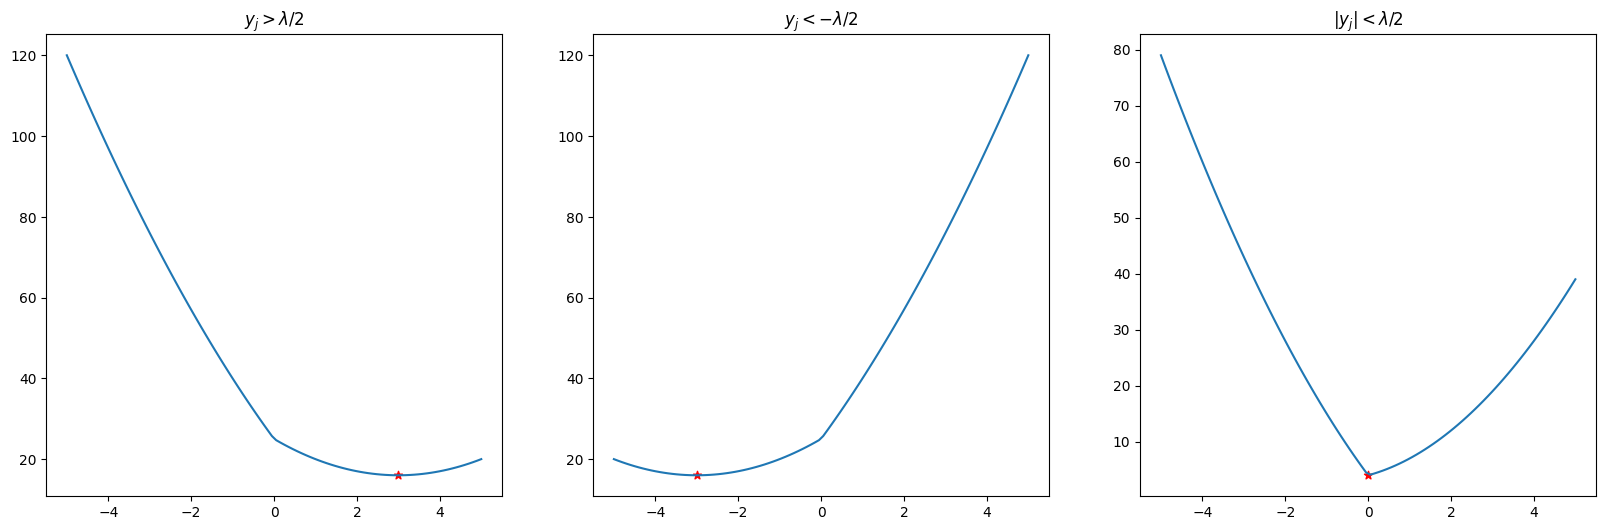

In [71]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))
ax[0].plot(lasso_case_1[:, 0], lasso_case_1[:, 1])
ax[0].set_title(r'$y_{j} > \lambda / 2$')
ax[0].scatter(x=[3], y=[(5 - 3)**2+4*3], marker='*', c='r')

ax[1].plot(lasso_case_2[:, 0], lasso_case_2[:, 1])
ax[1].set_title(r'$y_{j} < -\lambda / 2$')
ax[1].scatter(x=[-3], y=[(-5 + 3)**2+4*3], marker='*', c='r')

ax[2].plot(lasso_case_3[:, 0], lasso_case_3[:, 1])
ax[2].set_title(r'$|y_{j}| < \lambda / 2$')
ax[2].scatter(x=[0], y=[(2)**2+4*0], marker='*', c='r')

**7. Bayesian Connection to Lasso and Ridge**

*(a) Suppose that $y_{i} = \beta_{0} + \sum_{j=1}^{p}x_{ij}\beta_{j} + \epsilon_{i}$, where $\epsilon_{i},..., \epsilon_{n}$ are independent identically distributed random variables drawn from an $N(0, \sigma^{2})$ distribution. Write the likelihood for the data*

The likelihood for the data is a function which returns the probability of observing the responses given the predictors and coefficients. That is

$$
L(y) = P(Y|\beta, X) = f(y_{1})f(y_{2})...f(y_{n})
$$

As the irreducible error term is a normally distributed random variable the RHS of the equation is a normal random variable under a change of units, that is,

$$
\beta_{0} + \sum_{j=1}^{p}x_{ij}\beta_{j} + \epsilon_{i} \sim N(\beta_{0} + \sum_{j=1}^{p}x_{ij}\beta_{j}, \sigma^{2})
$$

Lets assume $\beta_{0} + \sum_{j=1}^{p}x_{ij}\beta_{j} = \mu$. Then we have,

$$
L(y) = f_{N(\mu, \sigma_{2})}(y_{1})...f_{N(\mu, \sigma_{2})}(y_{n})
$$

$$
L(y) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{y_{1} - \mu}{\sigma})^{2}}...\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{y_{n} - \mu}{\sigma})^{2}}
$$

Combining and simplifying we can show that,

$$
L(y) = (\frac{1}{\sigma\sqrt{2\pi}})^{n}e^{(-\frac{1}{2\sigma^{2}} \sum_{1}^{n}[y_{i} - \mu]^{2})}
$$

Where $\mu = \beta_{0} + \sum_{j=1}^{p}x_{ij}\beta_{j}$

*(b) Assume the following prior for $\beta: \beta_{1},...,\beta_{p}$ are independent and identically distributed random variables drawn from a double exponential distribution with mean 0 and common scale parameter b, i.e. $p(\beta) = \frac{1}{2b}e^{-|\beta|/b}$. Write out the posterior for $\beta$ in this setting*

$$
p(\beta | X, Y) \propto f(Y | X, \beta)p(\beta|X) = f(Y|X, \beta)p(\beta)
$$

$$
f(Y|X, \beta)p(\beta) = (\frac{1}{\sigma\sqrt{2\pi}})^{n}e^{(-\frac{1}{2\sigma^{2}} \sum_{1}^{n}[y_{i} - \beta_{0} + \sum_{j=1}^{p}x_{ij}\beta_{j}]^{2})}\frac{1}{2b}e^{-|\beta|/b}
$$

Simplifying

$$
f(Y|X, \beta)p(\beta) = (\frac{1}{\sigma\sqrt{2\pi}})^{n}\frac{1}{2b}e^{(-\frac{1}{2\sigma^{2}} \sum_{1}^{n}[y_{i} - \beta_{0} + \sum_{j=1}^{p}x_{ij}\beta_{j}]^{2} -|\beta|/b)}
$$



*(c) Argue that the lasso estimate is the mode for $\beta$ under this posterior distribution.*

To show that the lasso estimate is the posterior mode for this distribution is the same as showing the most likely value  for β
is given by the lasso solution with a certain λ

We can do this by taking our likelihood and posterior and showing that it can be reduced to the canonical Lasso Equation 6.7 from the book.

![alt text](../images/canonical_lasso.png)

Let's start by simplifying it by taking the logarithm of both sides:

$$
ln(f(Y|X, \beta)p(\beta)) = ln[(\frac{1}{\sigma\sqrt{2\pi}})^{n}\frac{1}{2b}] -(\frac{1}{2\sigma^{2}} \sum_{1}^{n}[y_{i} - \beta_{0} + \sum_{j=1}^{p}x_{ij}\beta_{j}]^{2} + |\beta|/b)
$$

Since the logarithm is monotonic increasing the value which maximises the above also maximises the posterior. Furthermore, since we are taking the difference of two values and only one of them depends on $\beta$ the maximisation problem becomes the below minimisation problems

$$
\argmin_{\beta} \frac{1}{2\sigma^{2}} \sum_{1}^{n}[y_{i} - \beta_{0} + \sum_{j=1}^{p}x_{ij}\beta_{j}]^{2} + |\beta|/b
$$
$$
= \argmin_{\beta} \sum_{1}^{n}[y_{i} - \beta_{0} + \sum_{j=1}^{p}x_{ij}\beta_{j}]^{2} + \frac{2\sigma^{2}}{b}|\beta|
$$
$$
= \argmin_{\beta} \sum_{1}^{n}[y_{i} - \beta_{0} + \sum_{j=1}^{p}x_{ij}\beta_{j}]^{2} + \frac{2\sigma^{2}}{b}\sum_{j=1}^{p}|\beta_{j}|
$$

By letting $\lambda = \frac{2\sigma^{2}}{b}$ we get,

$$
= \argmin_{\beta} \sum_{1}^{n}[y_{i} - \beta_{0} + \sum_{j=1}^{p}x_{ij}\beta_{j}]^{2} + \lambda\sum_{j=1}^{p}|\beta_{j}|
$$

Which is the lasso equation in 6.7


*(d) Assume the following prior for $\beta: \beta_{1},...,\beta_{p}$ are independent and identically distributed random variables drawn from a normal distribution with mean 0 and variance c. Write out the posterior for $\beta$ in this setting*

$$
p(\beta | X, Y) \propto f(Y | X, \beta)p(\beta|X) = f(Y|X, \beta)p(\beta)
$$

$$
p(\beta) = \prod_{j=1}^{p}\frac{1}{\sqrt{2c\pi}}e^{-\frac{\beta_{j}^{2}}{2c}} = (\frac{1}{\sqrt{2c\pi}})^{p}e^{(-\frac{1}{2c}\sum_{j=1}^{p}\beta_{j}^{2})}
$$

$$
f(Y|X, \beta)p(\beta) = (\frac{1}{\sigma\sqrt{2\pi}})^{n}e^{(-\frac{1}{2\sigma^{2}} \sum_{1}^{n}[y_{i} - \beta_{0} + \sum_{j=1}^{p}x_{ij}\beta_{j}]^{2})}(\frac{1}{\sqrt{2c\pi}})^{p}e^{(-\frac{1}{2c}\sum_{j=1}^{p}\beta_{j}^{2})}
$$

Simplfying,

$$
f(Y|X, \beta)p(\beta) = (\frac{1}{\sigma\sqrt{2\pi}})^{n}(\frac{1}{\sqrt{2c\pi}})^{p}e^{(-\frac{1}{2\sigma^{2}} \sum_{1}^{n}[y_{i} - \beta_{0} + \sum_{j=1}^{p}x_{ij}\beta_{j}]^{2}-\frac{1}{2c}\sum_{j=1}^{p}\beta_{j}^{2})}
$$




*(e) Argue that the ridge regression estimate is both the mode and the mean for $\beta$ under this posterior distribution.*

To show it is mode we simply need to show that the maximal value of the posterior above is equivalent to ridge regression minimisation problems. To do this we follow the logic above. First take the log,

$$
log(f(Y|X, \beta)p(\beta)) = ln((\frac{1}{\sigma\sqrt{2\pi}})^{n}(\frac{1}{\sqrt{2c\pi}})^{p}) - (\frac{1}{2\sigma^{2}} \sum_{1}^{n}[y_{i} + \beta_{0} + \sum_{j=1}^{p}x_{ij}\beta_{j}]^{2}-\frac{1}{2c}\sum_{j=1}^{p}\beta_{j}^{2})
$$

And realise we only need to minimise the term on the right to find the max,

$$
\argmin_{\beta} \frac{1}{2\sigma^{2}} \sum_{1}^{n}[y_{i} - \beta_{0} + \sum_{j=1}^{p}x_{ij}\beta_{j}]^{2} + \frac{1}{2c}\sum_{j=1}^{p}\beta_{j}^{2}
$$
$$
\argmin_{\beta} \sum_{1}^{n}[y_{i} - \beta_{0} + \sum_{j=1}^{p}x_{ij}\beta_{j}]^{2} + \frac{\sigma^{2}}{c}\sum_{j=1}^{p}\beta_{j}^{2}
$$

Setting $\lambda$ equal to $\frac{\sigma^{2}}{c}$ gives

$$
\argmin_{\beta} \sum_{1}^{n}[y_{i} - \beta_{0} + \sum_{j=1}^{p}x_{ij}\beta_{j}]^{2} + \lambda \sum_{j=1}^{p}\beta_{j}^{2}
$$

Which is the ridge regression equation from 6.5.